RDKit ERROR: [15:53:42] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [15:53:42] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:53:42] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:53:43] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [15:53:43] Explicit valence for atom # 13 Cl, 5, is greater than permitted
RDKit ERROR: [15:53:43] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
RDKit ERROR: [15:53:43] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C

Similar drugs found: 13
Chemical similarity threshold = 0.5


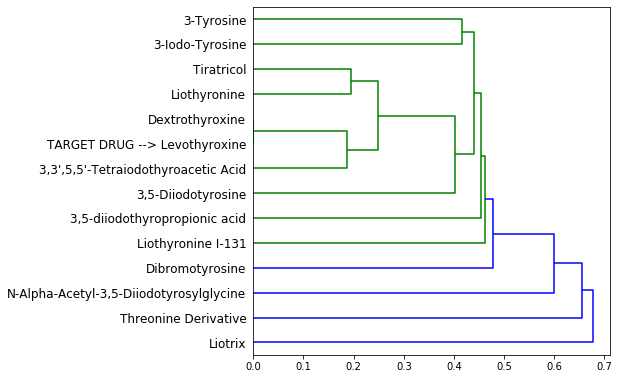

Levothyroxine (Synthroid, Tirosint, Unithroid): hormone used to treat hypothyroidism, the most
commonly prescribed medication in the United States (2016). Most similar to other agents used
to treat hypothyroidism, e.g., Liothyronine and Dextrothyroxine, as well as some experimental
drugs, e.g., 3-Tyrosine; 3-Iodo-Tyrosine; Tiratricol; 3,3',5,5'-Tetraiodothyroacetic Acid; and
3,5-diiodothyropropionic acid, indicating possible usages. Also similar to antithyroid agents,
e.g., 3,5-Diiodotyrosine and Dibromotyrosine, suggesting that drugs can be repurposed for the
opposite usage as the target drug.


In [10]:
# Select data and plot dendrogram for target drug


import pandas as pd
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from scipy.spatial.distance import squareform as sf
import scipy.cluster.hierarchy as hier
import matplotlib.pyplot as plt

target_drug = 'Levothyroxine'
similarity_threshold = 0.5
morgan_radius = 2
filepath = '/Users/OfficeDeskTop/DI Capstone/'

drugs = pd.read_csv(filepath + 'structure links.csv', quotechar = '"')
size = len(drugs)

# Find target_drug

i = 0
while drugs.at[i, 'Name'] != target_drug:
    if i == size - 1:
        sys.exit('Reading ERROR: "' + target_drug + '" not found in dataset.')
    else:
        i += 1

smiles_target = drugs.at[i, 'SMILES']

if smiles_target is np.nan:
    sys.exit('Completeness ERROR: ' + target_drug + ' SMILES unavailable.')
    
names_array = np.array(drugs.at[i, 'Name'])
smiles_array = np.array([smiles_target])
dice_array = []

# Find drugs similar to target_drug

ms_target = Chem.MolFromSmiles(smiles_target)
fps_target = AllChem.GetMorganFingerprint(ms_target, morgan_radius)

for i in range(size):
    if drugs.at[i, 'Name'] != target_drug:        
        smiles_i = drugs.at[i, 'SMILES']
        
        if smiles_i is not np.nan:
            ms_i = Chem.MolFromSmiles(smiles_i)
            
            if ms_i is not None:
                fps_i = AllChem.GetMorganFingerprint(ms_i, morgan_radius)
                T_target_i = DataStructs.DiceSimilarity(fps_target, fps_i)
            
                if T_target_i > similarity_threshold:
                    names_array = np.append(names_array, drugs.at[i, 'Name'])
                    smiles_array = np.append(smiles_array, smiles_i)
                    dice_array = np.append(dice_array, T_target_i)
                
print('Similar drugs found: ' + str(len(names_array) - 1))
print('Chemical similarity threshold = ' + str(similarity_threshold))

# Compute redundant distance matrix

size1 = len(smiles_array)                
rdist_matrix = np.zeros((size1, size1))

for i in range(size1):
    ms_i = Chem.MolFromSmiles(smiles_array[i])
    fps_i = AllChem.GetMorganFingerprint(ms_i, morgan_radius)
    
    for j in range(i + 1, size1):
        ms_j = Chem.MolFromSmiles(smiles_array[j])
        fps_j = AllChem.GetMorganFingerprint(ms_j, morgan_radius)
        T_ij = DataStructs.DiceSimilarity(fps_i, fps_j)
        rdist_matrix[i, j] = -np.log(T_ij)/np.log(2)
        rdist_matrix[j, i] = -np.log(T_ij)/np.log(2)

# Convert to condensed distance matrix

cdist_matrix = sf(rdist_matrix)

# Compute linkage matrix

link_matrix = hier.linkage(cdist_matrix)

# Compute and plot dendrogram

names_array[0] = 'TARGET DRUG --> ' + target_drug

if len(names_array) <= 30:
    plt.figure(figsize = [6.4, 6.4])
else:
    plt.figure(figsize = [6.4, 8.5])

dendrogram = hier.dendrogram(link_matrix, orientation = 'right', labels =
                             names_array, leaf_rotation = 0)
plt.show()
print('Levothyroxine (Synthroid, Tirosint, Unithroid): hormone used to treat hypothyroidism, the most')
print('commonly prescribed medication in the United States (2016). Most similar to other agents used')
print('to treat hypothyroidism, e.g., Liothyronine and Dextrothyroxine, as well as some experimental')
print("drugs, e.g., 3-Tyrosine; 3-Iodo-Tyrosine; Tiratricol; 3,3',5,5'-Tetraiodothyroacetic Acid; and")
print('3,5-diiodothyropropionic acid, indicating possible usages. Also similar to antithyroid agents,')
print('e.g., 3,5-Diiodotyrosine and Dibromotyrosine, suggesting that drugs can be repurposed for the')
print('opposite usage as the target drug.')
